# Telco Customer Churn Rate

Pada perusahaan layanan telekomunikasi, pasti ada pelanggan yang berhenti menggunakan layanan tersebut karena beberapa faktor
maka diperlukan program-program promosi yang ditargetkan langsung terhadap pelanggan yang diprediksi akan berhenti. Machine
learning model ini dibuat untuk memprediksi pelanggan yang akan berhenti langganan.

## 1. Data Preparation

Pada Proses ini kita akan melakukan cleaning terhadap data yang akan kita gunakan. Untuk langkah pertama kita akan menghilangkan fitur yang tidak perlu dan membersihkan data dari data null. selanjutnya mengubah data string menjadi numerik. dan yang terakhir kita akan melakukan normalisasi data.

In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams
%matplotlib inline

data = pd.read_csv('D:/Digital Talent Scholarship/project/telco-churn-rate/WA_Fn-UseC_-Telco-Customer-Churn.csv') # Load data yang akan kita gunakan
df = pd.read_csv('D:/Digital Talent Scholarship/project/telco-churn-rate/WA_Fn-UseC_-Telco-Customer-Churn.csv')

### Data Visualization

In [16]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


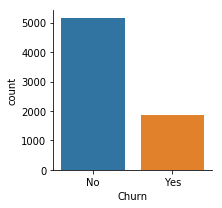

In [17]:
ax = sns.catplot(x="Churn", kind="count", data=df, height=3, aspect=1, orient='v')

In [3]:
df['Churn'].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [18]:
missing_data=len(df[df['TotalCharges'] == " "])
total_data=len(df['TotalCharges'])
percentage_missing_data=missing_data/total_data*100
percentage_missing_data=round(percentage_missing_data,3)
print('data yang hilang berjumlah ', missing_data)
print('persen data yang hilang '+str(percentage_missing_data)+'%')



data yang hilang berjumlah  11
persen data yang hilang 0.156%


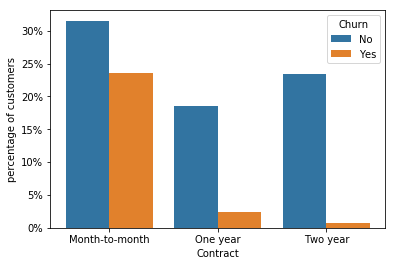

In [8]:
def barplot_percentages(feature, orient='v', axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = data.groupby(feature)["Churn"].value_counts().to_frame()
    g = g.rename({"Churn": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(data)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
barplot_percentages("Contract")

## 2. Data Cleaning


fitur customer ID akan dihilangkan karena tidak berpengaruh terhadap labelling data.

In [19]:
data.drop(['customerID'], axis=1, inplace=True)

karena terdapat data null pada kolom TotalCharges, maka akan kita hilangkan

In [20]:
#Data Manipulation
data['TotalCharges'] = data["TotalCharges"].replace(" ",np.nan)# mengganti spasi menjadi data null

data=data.dropna() #Menghilangkan nilai null pada data
data["TotalCharges"] = data["TotalCharges"].astype(float) #mengubah data menjadi tipe float


## 3. Data Preprocessing

### Mengubah data string menjadi numerik

In [21]:
data['Partner'] = data['Partner'].map(lambda s :1  if s =='Yes' else 0)
data['Churn'] = data['Churn'].map(lambda s :1  if s =='Yes' else 0)
data['gender'] = data['gender'].map(lambda s :1  if s =='Male' else 0)
data['Dependents'] = data['Dependents'].map(lambda s :1  if s =='Yes' else 0)
data['PhoneService'] = data['PhoneService'].map(lambda s :1  if s =='Yes' else 0)
data['PaperlessBilling'] = data['PaperlessBilling'].map(lambda s :1  if s =='Yes' else 0)
data['OnlineSecurity'] = data['OnlineSecurity'].map(lambda s :1  if s =='Yes' else 0)
data['OnlineBackup'] = data['OnlineBackup'].map(lambda s :1  if s =='Yes' else 0)
data['DeviceProtection'] = data['DeviceProtection'].map(lambda s :1  if s =='Yes' else 0)
data['TechSupport'] = data['TechSupport'].map(lambda s :1  if s =='Yes' else 0)
data['StreamingTV'] = data['StreamingTV'].map(lambda s :1  if s =='Yes' else 0)
data['StreamingMovies'] = data['StreamingMovies'].map(lambda s :1  if s =='Yes' else 0)
data['MultipleLines'].replace('No phone service','No', inplace=True)
data['MultipleLines'] = data['MultipleLines'].map(lambda s :1  if s =='Yes' else 0)
data['Has_InternetService'] = data['InternetService'].map(lambda s :0  if s =='No' else 1)
data['Fiber_optic'] = data['InternetService'].map(lambda s :1  if s =='Fiber optic' else 0)
data['DSL'] = data['InternetService'].map(lambda s :1  if s =='DSL' else 0)
#data = pd.get_dummies(data=data, columns=['PaymentMethod'])
data['PaymentMethod']=data['PaymentMethod'].map(lambda s:3 if s=='Electronic check' else (2 if s=='Mailed check' else(1 if s=='Bank transfer (automatic)' else 0)))
data['Contract'] = data['Contract'].map(lambda s :2  if s =='Two year' else (1 if s=='One year' else 0 ))
#data = pd.get_dummies(data=data, columns=['Contract'])
data.drop(['InternetService'], axis=1, inplace=True)

data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Has_InternetService,Fiber_optic,DSL
0,0,0,1,0,1,0,0,0,1,0,...,0,0,1,3,29.85,29.85,0,1,0,1
1,1,0,0,0,34,1,0,1,0,1,...,0,1,0,2,56.95,1889.50,0,1,0,1
2,1,0,0,0,2,1,0,1,1,0,...,0,0,1,2,53.85,108.15,1,1,0,1
3,1,0,0,0,45,0,0,1,0,1,...,0,1,0,1,42.30,1840.75,0,1,0,1
4,0,0,0,0,2,1,0,0,0,0,...,0,0,1,3,70.70,151.65,1,1,1,0


In [209]:
data['PaymentMethod'].value_counts()

3    2365
2    1604
1    1542
0    1521
Name: PaymentMethod, dtype: int64

### Normalisasi Data 

In [22]:
data=(data-data.min())/(data.max()-data.min())

In [23]:
#Pemisahan data training dan data test
from sklearn.model_selection import train_test_split
data["Churn"] = data["Churn"].astype(int)
y = data["Churn"]
X = data.drop(labels = ["Churn"],axis = 1)
n_samples=len(y)
"""
X_train=X[:(6*n_samples//7)]
X_test=X[(6*n_samples//7):]
y_train=y[:6*n_samples//7]
y_test=y[6*n_samples//7:]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, train_size=6/7, random_state=42)
"""

'\nX_train=X[:(6*n_samples//7)]\nX_test=X[(6*n_samples//7):]\ny_train=y[:6*n_samples//7]\ny_test=y[6*n_samples//7:]\n\n#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, train_size=6/7, random_state=42)\n'

In [24]:
X.shape

(7032, 21)

## 4. Feature Selection 

### Pemilihan nilai K pada Feature Selection  K-best features menggunakan SVM

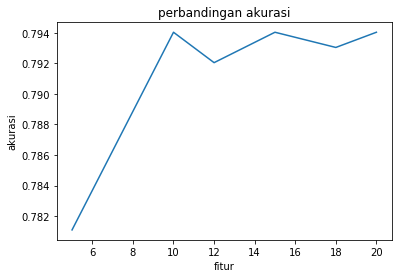

In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import svm
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

def svm_predict(a):
    X = data.drop(labels = ["Churn"],axis = 1)
    X = SelectKBest(chi2, k=a).fit_transform(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, train_size=6/7, random_state=42)
    clf = svm.LinearSVC()
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)
    accuracy = accuracy_score(y_test, prediction)
    return accuracy
K=[5,10,12,15,18,20]
list_accuracy=[]
for i in K:
    list_accuracy.append(svm_predict(i))
x_label=K
y_label=list_accuracy
plt.plot(x_label,y_label)
plt.title('perbandingan akurasi')
plt.xlabel('fitur')
plt.ylabel('akurasi')
plt.show()

### Pemilihan Nilai K-best Features dengan Logistic Regression

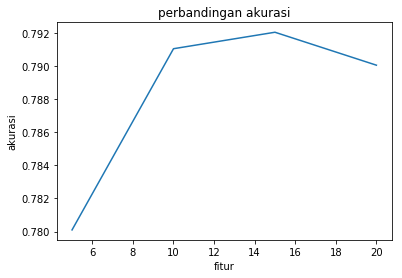

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import chi2
from sklearn import svm
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

def svm_predict(a):
    X = data.drop(labels = ["Churn"],axis = 1)
    X = SelectKBest(chi2, k=a).fit_transform(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, train_size=6/7, random_state=42)
    clf = LogisticRegression(random_state=0,C=1, solver='newton-cg',multi_class='ovr',max_iter=200)
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)
    accuracy = accuracy_score(y_test, prediction)
    return accuracy
K=[5,10,15,20]
list_accuracy=[]
for i in K:
    list_accuracy.append(svm_predict(i))
x_label=K
y_label=list_accuracy
plt.plot(x_label,y_label)
plt.title('perbandingan akurasi')
plt.xlabel('fitur')
plt.ylabel('akurasi')
plt.show()

In [42]:
selector = SelectKBest(chi2, k = 15)
#New dataframe with the selected features for later use in the classifier. fit() method works too, if you want only the feature names and their corresponding scores
X_new = selector.fit_transform(X, y)
names = X.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feature_names', 'chi_scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['chi_scores', 'Feature_names'], ascending = [False, True])
print(ns_df_sorted)

          Feature_names  chi_scores
7              Contract  555.879527
13          Fiber_optic  372.082851
3                tenure  238.007569
4        OnlineSecurity  147.165601
6           TechSupport  135.439602
0         SeniorCitizen  133.482766
2            Dependents  131.271509
9         PaymentMethod  127.090985
8      PaperlessBilling  104.979224
1               Partner   81.857769
12  Has_InternetService   78.723191
11         TotalCharges   73.258486
14                  DSL   71.137611
10       MonthlyCharges   50.600233
5          OnlineBackup   31.209832


In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = SelectKBest(chi2, k=15).fit_transform(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, train_size=6/7, random_state=42)

## 5. Machine Learning Model

Untuk jenis machine learning yang akan digunakan. Pilihan penulis adalah menggunakan SVM atau Logistic Regression.

### SVM

In [28]:
%%time
from sklearn import svm
from sklearn.model_selection import GridSearchCV
# Create regularization penalty space
# Create regularization hyperparameter space
C = [0.001, 0.01, 0.1, 1, 10]
gamma = [0.001, 0.01, 0.1, 1]
kernel=['linear','poly','rbf','sigmoid']

# Create hyperparameter options
hyperparameters = dict(C=C, gamma=gamma, kernel=kernel)
clf = GridSearchCV(svm.SVC(), hyperparameters, cv=5, verbose=0)
best_model = clf.fit(X_train, y_train)
print('Best kernel:', best_model.best_estimator_.get_params()['kernel'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('Best gamma:', best_model.best_estimator_.get_params()['gamma'])

Best kernel: rbf
Best C: 1
Best gamma: 1
Wall time: 21min 8s


In [28]:
%%time
from sklearn import svm
from sklearn.metrics import accuracy_score
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, train_size=6/7, random_state=42,shuffle=True)
clf = svm.SVC(C=1,gamma=1,kernel='rbf')
print("Training Classifier...")
clf.fit(X_train, y_train)
print("Predicting...")
prediction = clf.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
print ('Accuracy:', accuracy)


Training Classifier...
Predicting...
Accuracy: 0.7820895522388059
Wall time: 2.18 s


### Logistic Regression

Pemilihan nilai parameter sistem Logistic Regression dengan cross validation

In [22]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)
solver=['newton-cg','lbfgs','liblinear','sag','saga']

logistic = LogisticRegression()
# Create hyperparameter options
hyperparameters = dict(C=C, solver=solver)
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)
best_model = clf.fit(X_train, y_train)
print('Best Solver:', best_model.best_estimator_.get_params()['solver'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Solver: newton-cg
Best C: 166.81005372000593


In [29]:
%%time
from sklearn.linear_model import LogisticRegression

clf2 = LogisticRegression(C=166.8,penalty='l2',random_state=0, solver='newton-cg',multi_class='ovr',max_iter=200)
print('Training Classifier....')
clf2.fit(X_train,y_train)
print("predicting ......")
prediction2=clf2.predict(X_test)
accuracy2=accuracy_score(y_test,prediction2)
print('accuracy: ', accuracy2)

Training Classifier....
predicting ......
accuracy:  0.7940298507462686
Wall time: 96 ms


## 6. Performa Sistem 

Performa Sistem diukur menggunakan confusion matrix

In [30]:
from sklearn import datasets,metrics
predictions = clf.predict(X_test)
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(y_test, predictions)))
print("Confusion matrix:\n%s" %metrics.confusion_matrix(y_test,predictions))
print("Accuracy: %0.4f" % metrics.accuracy_score(y_test,predictions))

predictions = clf2.predict(X_test)
print("Classification report for classifier %s:\n%s\n"
      % (clf2, metrics.classification_report(y_test, predictions)))
print("Confusion matrix:\n%s" %metrics.confusion_matrix(y_test,predictions))
print("Accuracy: %0.4f" % metrics.accuracy_score(y_test,predictions))


Classification report for classifier SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       0.83      0.88      0.86       737
          1       0.61      0.50      0.55       268

avg / total       0.77      0.78      0.77      1005


Confusion matrix:
[[652  85]
 [134 134]]
Accuracy: 0.7821
Classification report for classifier LogisticRegression(C=166.8, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False):
             precision    recall  f1-score   support

          0       0.84      0.89      0.86       737
          1       0.64      0.53      0.58       268

avg / t

### Menampilkan hasil prediksi sistem

In [31]:

hasil_prediksi=clf2.predict(X_test[:10])
hasil_sebenarnya=y_test[:10]

print("prediksi dari sistem ", hasil_prediksi)
print(hasil_sebenarnya)


prediksi dari sistem  [0 0 1 0 0 0 0 1 0 0]
2481    0
6784    0
6125    1
3052    0
4099    0
3223    0
3774    0
3469    0
3420    0
1196    0
Name: Churn, dtype: int32
